In [1]:
from base import *
import csv

/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
from sklearn.preprocessing import LabelEncoder
from io import StringIO
file_path='/data/chenxi/llm-feature-engeneering/dataset/diabetes.arff'

with open(file_path, 'r') as f:
    lines = f.readlines()

# Extract attribute names
attributes = []
for line in lines:
    if line.startswith("@attribute"):
        attributes.append(line.split()[1])

# Extract data
data_start_index = lines.index("@data\n") + 1
data_lines = "\n".join(lines[data_start_index:])

# Convert data lines to DataFrame
df = pd.read_csv(StringIO(data_lines), header=None, names=attributes, na_values="?")

# Replace missing values with -1
df.fillna(-1, inplace=True)

# Convert categorical string data into numbers
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of object type (string)
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [3]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')>

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from transformers import BertModel, BertTokenizer

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.6
CUDA SETUP: Detected CUDA version 117
CUDA SETUP: Loading binary /data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so...


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: /data/chenxi/anaconda3/envs/myenv did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('vs/workbench/api/node/extensionHostProcess')}
  warn(msg)
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('module'), PosixPath('//matplotlib_inline.backend_inline')}
  warn(msg)
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: Found duplicate ['libcudart.so', 'libcudart.so.11.0', 'libcuda

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import re
def get_matching_cols(df, regex):
    r = re.compile(regex)
    return( list( filter( r.match, df.columns) ) )

def get_embedding_cols(df):
    return get_matching_cols(df, "(vec_\d+)")

## ours


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
INFO:base:Downloading pre-trained model 'fine_tuned_model_diabetes1'


Processing seed 0...


INFO:base:Downloading tokenizer for 'fine_tuned_model_diabetes1'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 491/491 [00:02<00:00, 185.18 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 154/154 [00:00<00:00, 252.60 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.8311688311688312
Method: baseline | Model: Logistic Regression | roc_auc: 0.8761185126267649
Method: baseline | Model: Random Forest | accuracy: 0.8311688311688312
Method: baseline | Model: Random Forest | roc_auc: 0.868860608470869
Method: baseline | Model: AdaBoost | accuracy: 0.7857142857142857
Method: baseline | Model: AdaBoost | roc_auc: 0.8681646450586598
Method: baseline | Model: Gradient Boosting | accuracy: 0.8116883116883117
Method: baseline | Model: Gradient Boosting | roc_auc: 0.8363491747862399
Method: baseline | Model: Support Vector Machine | accuracy: 0.8181818181818182
Method: baseline | Model: Support Vector Machine | roc_auc: 0.865977331477431
Method: baseline | Model: XGBoost | accuracy: 0.7987012987012987
Method: baseline | Model: XGBoost | roc_auc: 0.8303837741101611


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8896103896103896
Method: SelectK | Model: Logistic Regression | roc_auc: 0.9652018293895407
Method: SelectK | Model: Random Forest | accuracy: 0.935064935064935
Method: SelectK | Model: Random Forest | roc_auc: 0.9390534897593955
Method: SelectK | Model: AdaBoost | accuracy: 0.8766233766233766
Method: SelectK | Model: AdaBoost | roc_auc: 0.9471067806721017
Method: SelectK | Model: Gradient Boosting | accuracy: 0.922077922077922
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.951680254523762
Method: SelectK | Model: Support Vector Machine | accuracy: 0.7987012987012987
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.8928216345197852
Method: SelectK | Model: XGBoost | accuracy: 0.9025974025974026
Method: SelectK | Model: XGBoost | roc_auc: 0.9648041360111355
Method: PCA | Model: Logistic Regression | accuracy: 0.8636363636363636
Method: PCA | Model: Logistic Regression | roc_auc: 0.9137005368860609
Method: PC

INFO:base:Downloading pre-trained model 'fine_tuned_model_diabetes2'


Method: PCA | Model: XGBoost | accuracy: 0.9025974025974026
Method: PCA | Model: XGBoost | roc_auc: 0.919168820839133
Processing seed 1...


INFO:base:Downloading tokenizer for 'fine_tuned_model_diabetes2'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 491/491 [00:01<00:00, 267.63 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 154/154 [00:00<00:00, 260.33 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.7792207792207793
Method: baseline | Model: Logistic Regression | roc_auc: 0.8457300275482095
Method: baseline | Model: Random Forest | accuracy: 0.7922077922077922
Method: baseline | Model: Random Forest | roc_auc: 0.8543617998163452
Method: baseline | Model: AdaBoost | accuracy: 0.7987012987012987
Method: baseline | Model: AdaBoost | roc_auc: 0.8444444444444446
Method: baseline | Model: Gradient Boosting | accuracy: 0.7792207792207793
Method: baseline | Model: Gradient Boosting | roc_auc: 0.8479338842975207
Method: baseline | Model: Support Vector Machine | accuracy: 0.8116883116883117
Method: baseline | Model: Support Vector Machine | roc_auc: 0.869421487603306
Method: baseline | Model: XGBoost | accuracy: 0.7727272727272727
Method: baseline | Model: XGBoost | roc_auc: 0.8471992653810835


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8376623376623377
Method: SelectK | Model: Logistic Regression | roc_auc: 0.8694214876033057
Method: SelectK | Model: Random Forest | accuracy: 0.8506493506493507
Method: SelectK | Model: Random Forest | roc_auc: 0.9480257116620753
Method: SelectK | Model: AdaBoost | accuracy: 0.8506493506493507
Method: SelectK | Model: AdaBoost | roc_auc: 0.9017447199265382
Method: SelectK | Model: Gradient Boosting | accuracy: 0.8636363636363636
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.936455463728191
Method: SelectK | Model: Support Vector Machine | accuracy: 0.7857142857142857
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.8317722681359044
Method: SelectK | Model: XGBoost | accuracy: 0.8701298701298701
Method: SelectK | Model: XGBoost | roc_auc: 0.9366391184573003
Method: PCA | Model: Logistic Regression | accuracy: 0.8441558441558441
Method: PCA | Model: Logistic Regression | roc_auc: 0.8833792470156107
Method: 

INFO:base:Downloading pre-trained model 'fine_tuned_model_diabetes3'


Method: PCA | Model: XGBoost | accuracy: 0.8311688311688312
Method: PCA | Model: XGBoost | roc_auc: 0.8721763085399448
Processing seed 2...


INFO:base:Downloading tokenizer for 'fine_tuned_model_diabetes3'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 491/491 [00:02<00:00, 204.03 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 154/154 [00:00<00:00, 253.42 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.7727272727272727
Method: baseline | Model: Logistic Regression | roc_auc: 0.7963302752293578
Method: baseline | Model: Random Forest | accuracy: 0.7532467532467533
Method: baseline | Model: Random Forest | roc_auc: 0.8260958205912335
Method: baseline | Model: AdaBoost | accuracy: 0.7402597402597403
Method: baseline | Model: AdaBoost | roc_auc: 0.7510703363914373
Method: baseline | Model: Gradient Boosting | accuracy: 0.7532467532467533
Method: baseline | Model: Gradient Boosting | roc_auc: 0.7955147808358818
Method: baseline | Model: Support Vector Machine | accuracy: 0.7402597402597403
Method: baseline | Model: Support Vector Machine | roc_auc: 0.8135575942915393
Method: baseline | Model: XGBoost | accuracy: 0.7337662337662337
Method: baseline | Model: XGBoost | roc_auc: 0.7751274209989806


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8636363636363636
Method: SelectK | Model: Logistic Regression | roc_auc: 0.872579001019368
Method: SelectK | Model: Random Forest | accuracy: 0.9090909090909091
Method: SelectK | Model: Random Forest | roc_auc: 0.9310907237512742
Method: SelectK | Model: AdaBoost | accuracy: 0.8961038961038961
Method: SelectK | Model: AdaBoost | roc_auc: 0.9225280326197758
Method: SelectK | Model: Gradient Boosting | accuracy: 0.9090909090909091
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.9372069317023445
Method: SelectK | Model: Support Vector Machine | accuracy: 0.7987012987012987
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.8277268093781854
Method: SelectK | Model: XGBoost | accuracy: 0.9090909090909091
Method: SelectK | Model: XGBoost | roc_auc: 0.9268093781855249
Method: PCA | Model: Logistic Regression | accuracy: 0.8766233766233766
Method: PCA | Model: Logistic Regression | roc_auc: 0.9284403669724771
Method: 

INFO:base:Downloading pre-trained model 'fine_tuned_model_diabetes4'


Method: PCA | Model: XGBoost | accuracy: 0.8961038961038961
Method: PCA | Model: XGBoost | roc_auc: 0.926401630988787
Processing seed 3...


INFO:base:Downloading tokenizer for 'fine_tuned_model_diabetes4'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 491/491 [00:01<00:00, 266.77 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 154/154 [00:00<00:00, 269.83 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.7467532467532467
Method: baseline | Model: Logistic Regression | roc_auc: 0.8180224403927069
Method: baseline | Model: Random Forest | accuracy: 0.7207792207792207
Method: baseline | Model: Random Forest | roc_auc: 0.7967215988779803
Method: baseline | Model: AdaBoost | accuracy: 0.7402597402597403
Method: baseline | Model: AdaBoost | roc_auc: 0.8321353436185133
Method: baseline | Model: Gradient Boosting | accuracy: 0.7272727272727273
Method: baseline | Model: Gradient Boosting | roc_auc: 0.7886570827489481
Method: baseline | Model: Support Vector Machine | accuracy: 0.7532467532467533
Method: baseline | Model: Support Vector Machine | roc_auc: 0.8192496493688639
Method: baseline | Model: XGBoost | accuracy: 0.7272727272727273
Method: baseline | Model: XGBoost | roc_auc: 0.7961079943899019


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8311688311688312
Method: SelectK | Model: Logistic Regression | roc_auc: 0.8851683029453015
Method: SelectK | Model: Random Forest | accuracy: 0.8636363636363636
Method: SelectK | Model: Random Forest | roc_auc: 0.9145336605890604
Method: SelectK | Model: AdaBoost | accuracy: 0.8766233766233766
Method: SelectK | Model: AdaBoost | roc_auc: 0.9235624123422159
Method: SelectK | Model: Gradient Boosting | accuracy: 0.8376623376623377
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.9239130434782609
Method: SelectK | Model: Support Vector Machine | accuracy: 0.7012987012987013
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.8285413744740534
Method: SelectK | Model: XGBoost | accuracy: 0.8701298701298701
Method: SelectK | Model: XGBoost | roc_auc: 0.9126928471248248
Method: PCA | Model: Logistic Regression | accuracy: 0.8701298701298701
Method: PCA | Model: Logistic Regression | roc_auc: 0.8900771388499298
Method:

INFO:base:Downloading pre-trained model 'fine_tuned_model_diabetes5'


Method: PCA | Model: XGBoost | accuracy: 0.8831168831168831
Method: PCA | Model: XGBoost | roc_auc: 0.8823632538569426
Processing seed 4...


INFO:base:Downloading tokenizer for 'fine_tuned_model_diabetes5'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 491/491 [00:01<00:00, 277.51 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 154/154 [00:00<00:00, 264.20 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.8051948051948052
Method: baseline | Model: Logistic Regression | roc_auc: 0.858974358974359
Method: baseline | Model: Random Forest | accuracy: 0.7922077922077922
Method: baseline | Model: Random Forest | roc_auc: 0.8416289592760181
Method: baseline | Model: AdaBoost | accuracy: 0.7727272727272727
Method: baseline | Model: AdaBoost | roc_auc: 0.8197586726998491
Method: baseline | Model: Gradient Boosting | accuracy: 0.7662337662337663
Method: baseline | Model: Gradient Boosting | roc_auc: 0.8391779788838613
Method: baseline | Model: Support Vector Machine | accuracy: 0.7662337662337663
Method: baseline | Model: Support Vector Machine | roc_auc: 0.8350301659125189
Method: baseline | Model: XGBoost | accuracy: 0.7077922077922078
Method: baseline | Model: XGBoost | roc_auc: 0.7950603318250378


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8701298701298701
Method: SelectK | Model: Logistic Regression | roc_auc: 0.9098793363499246
Method: SelectK | Model: Random Forest | accuracy: 0.8701298701298701
Method: SelectK | Model: Random Forest | roc_auc: 0.9449472096530921
Method: SelectK | Model: AdaBoost | accuracy: 0.8766233766233766
Method: SelectK | Model: AdaBoost | roc_auc: 0.9138386123680241
Method: SelectK | Model: Gradient Boosting | accuracy: 0.8831168831168831
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.9496606334841629
Method: SelectK | Model: Support Vector Machine | accuracy: 0.8311688311688312
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.9068627450980392
Method: SelectK | Model: XGBoost | accuracy: 0.9155844155844156
Method: SelectK | Model: XGBoost | roc_auc: 0.948340874811463
Method: PCA | Model: Logistic Regression | accuracy: 0.8571428571428571
Method: PCA | Model: Logistic Regression | roc_auc: 0.9038461538461539
Method: 

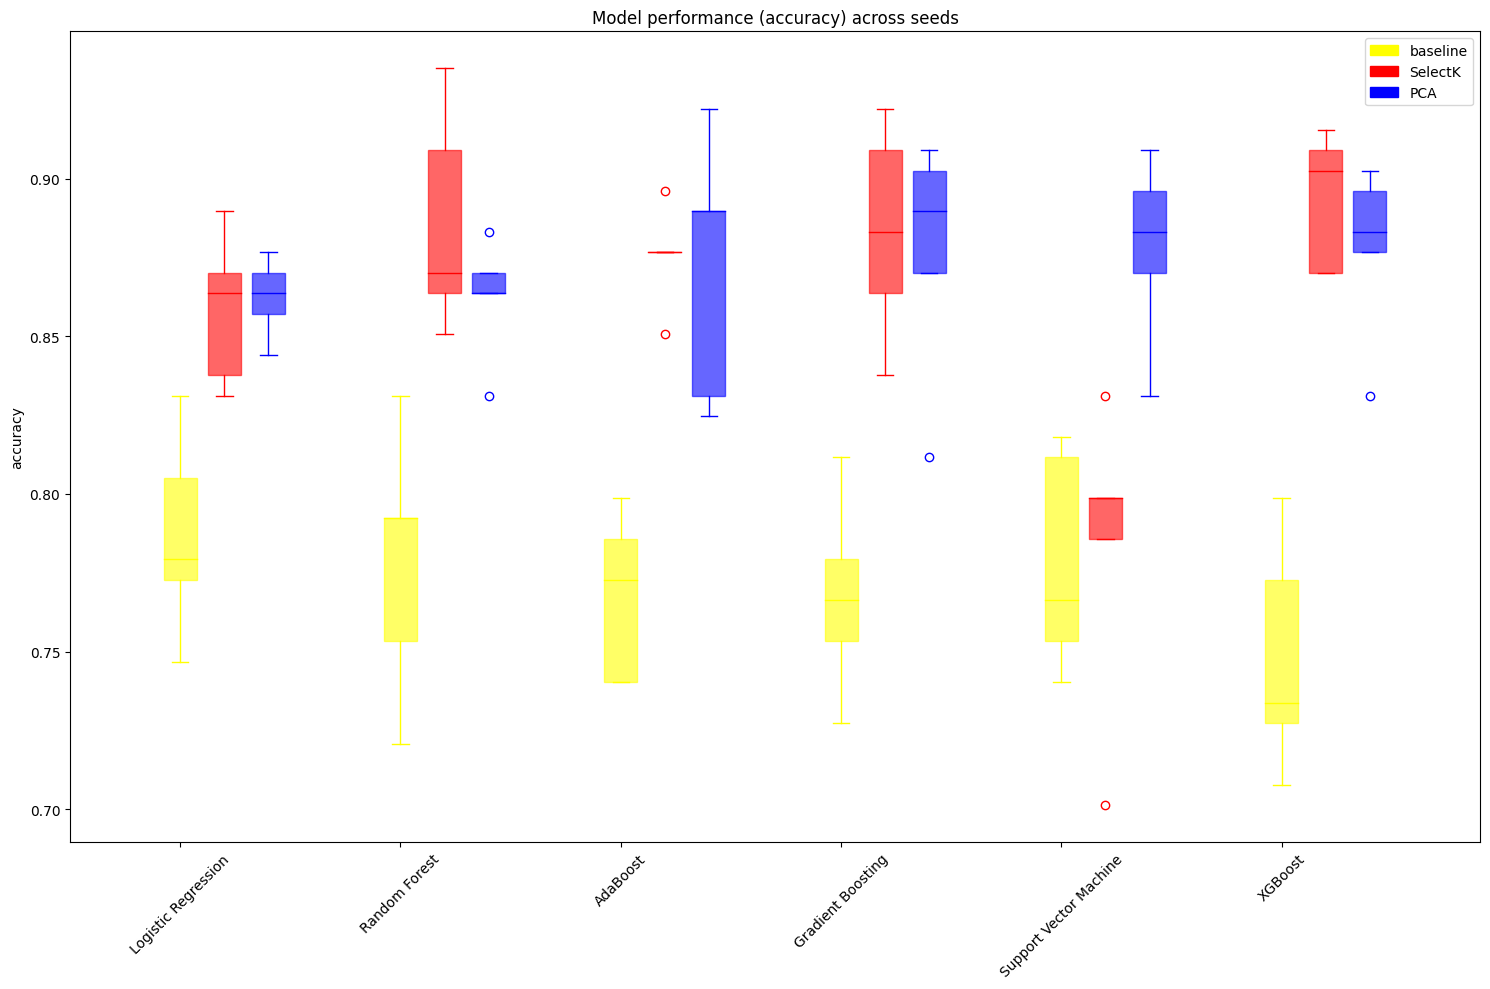

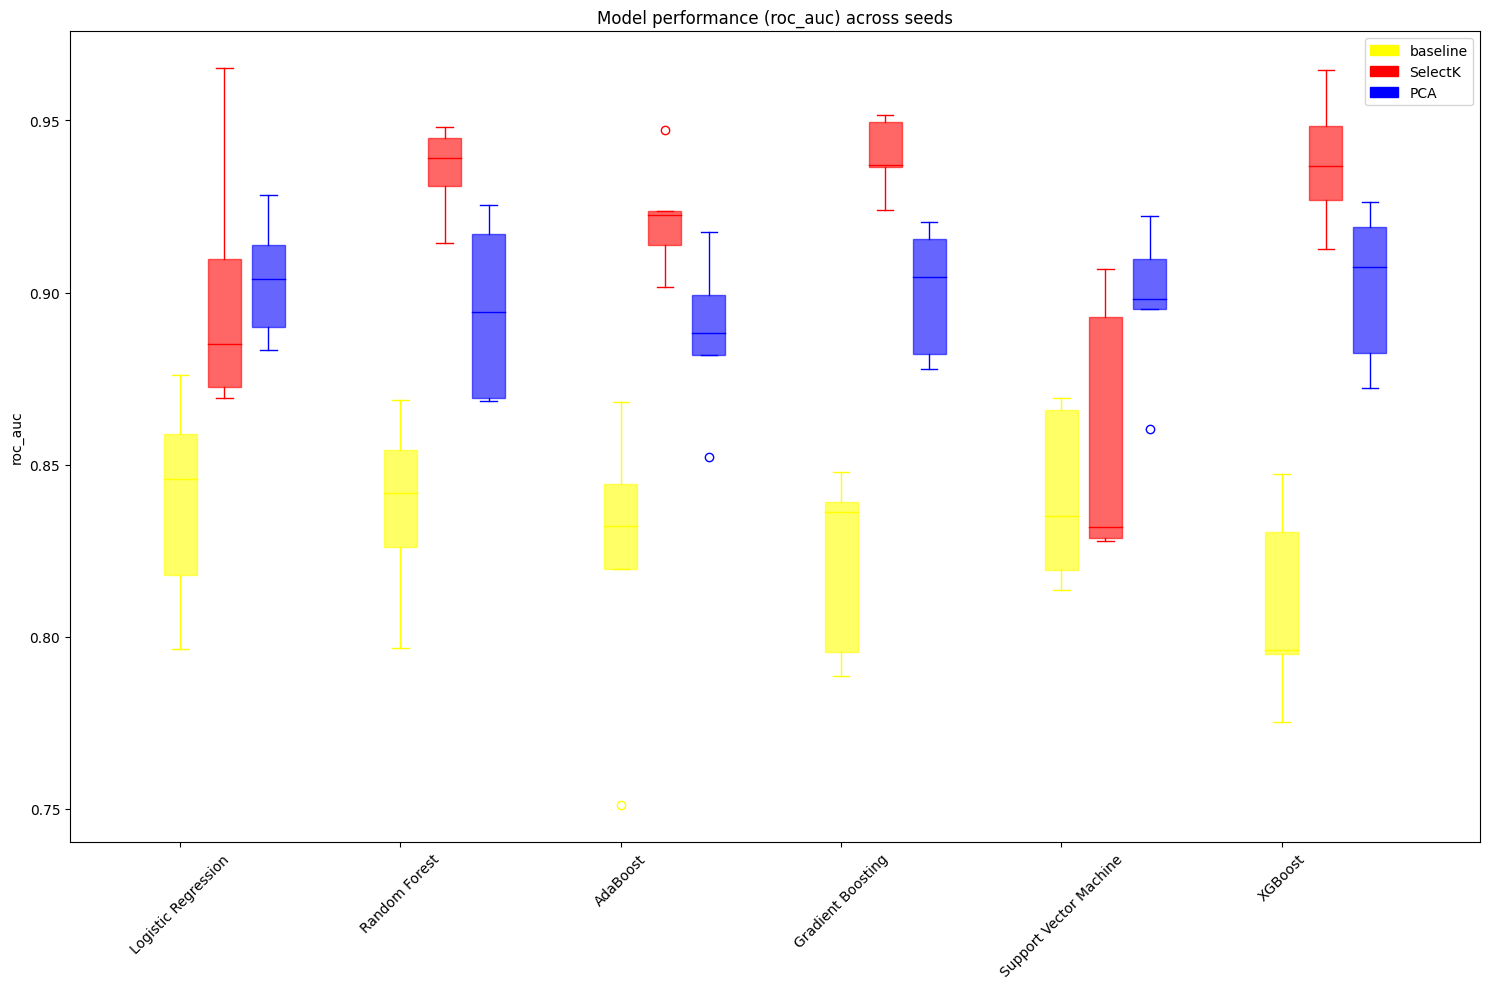

In [6]:
import openai
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import re
import json
import datetime
from sklearn.metrics import accuracy_score, roc_auc_score
# Define the openai API key (Make sure to keep it confidential!)

# Utility functions
def get_matching_cols(df, regex):
    r = re.compile(regex)
    return list(filter(r.match, df.columns))

def get_embedding_cols(df):
    return get_matching_cols(df, "(vec_\d+)")

def explode(col, prefix):
    n_cols = len(col[0])
    col_names = [prefix + str(i) for i in range(n_cols)]
    return pd.DataFrame(col.to_list(), columns=col_names)

def method_baseline(df, scaler=None):
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    X_cat = X[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
    
    if scaler is None:
        scaler = StandardScaler()
        X_final = scaler.fit_transform(X_cat)
    else:
        X_final = scaler.transform(X_cat)
    
    return X_final, y, scaler

def method_SelectK(df, scaler=None, selector=None):
    def explode(col, prefix):
        n_cols = len(col[0])
        col_names = [prefix + str(i) for i in range(n_cols)]
        return pd.DataFrame(col.to_list(), columns=col_names)

    # Explode text_vector
    exploded = explode(df['text_vector'], 'vec_')
    df.loc[:, exploded.columns] = exploded

    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Extract features
    X_cat = X[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
    embed_cols = get_embedding_cols(X)
    X_text = X[embed_cols]
    X_comb = pd.concat([X_cat, X_text], axis=1)

    # Scale the data
    if scaler is None:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_comb)
    else:
        X_scaled = scaler.transform(X_comb)

    # Feature selection
    if selector is None:
        selector = SelectKBest(mutual_info_classif, k=20)
        X_selected = selector.fit_transform(X_scaled, y)
    else:
        X_selected = selector.transform(X_scaled)

    X_final = pd.concat([X_cat, pd.DataFrame(X_selected)], axis=1)
    X_final.columns = X_final.columns.astype(str)

    return X_final, y, scaler, selector

def fit_PCA(train_df):
    # Exploding the embeddings into separate columns
    exploded = explode(train_df['text_vector'], 'vec_')
    train_df.loc[:, exploded.columns] = exploded
    
    # Splitting X and y
    X = train_df.drop('Outcome', axis=1)
    y = train_df['Outcome']

    # Separate original categorical features
    X_cat = X[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
    # Extract the text embeddings
    embed_cols = get_embedding_cols(X)
    X_text = X[embed_cols]

    # Combine the embeddings and the original set
    X_comb = pd.concat([X_cat, X_text], axis=1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_comb)
    
# Applying PCA on the combined data
    best_n_components = None
    best_score = float('-inf')
    for n_components in range(1, 50):  # Checking all possible number of components
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_scaled)

        # Train a model (e.g., logistic regression) on the PCA components and compute the performance
        model2 = LogisticRegression()
        score = cross_val_score(model2, X_pca, y, cv=5, scoring='roc_auc').mean()

        if score > best_score:
            best_score = score
            best_n_components = n_components
    
    pca = PCA(n_components=best_n_components)
    pca.fit(X_scaled)
    return pca, best_n_components, scaler

def transform_with_PCA(pca,scaler, df):
 # Exploding the embeddings into separate columns
    exploded = explode(df['text_vector'], 'vec_')
    df.loc[:, exploded.columns] = exploded
    
    # Splitting X and y
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Separate original categorical features
    X_cat = X[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
    
    # Extract the text embeddings
    embed_cols = get_embedding_cols(X)
    X_text = X[embed_cols]

    # Combine the embeddings and the original set
    X_comb = pd.concat([X_cat, X_text], axis=1)
    X_scaled = scaler.transform(X_comb)  # Only transform using the previously fitted scaler
    
    X_pca = pca.transform(X_scaled)
    X_final = pd.DataFrame(X_pca)
    X_final.columns = [f'PC{i+1}' for i in range(X_final.shape[1])]
    
    return X_final, df['Outcome']



def evaluate_models(train_df, test_df, models, methods):
    method_results = {}
    
    for method in methods:
        method_results[method] = {}

        if method == 'baseline':
            X_train, y_train, scaler = method_baseline(train_df)
            X_test, y_test, _ = method_baseline(test_df, scaler)
        elif method == 'PCA':
            pca, best_n_components, scaler = fit_PCA(train_df)
            X_train, y_train = transform_with_PCA(pca, scaler, train_df)
            X_test, y_test = transform_with_PCA(pca, scaler, test_df)
        elif method == 'SelectK':
            X_train, y_train, train_scaler, train_selector = method_SelectK(train_data)
            X_test, y_test, _, _ = method_SelectK(test_data, train_scaler, train_selector)

        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            for metric in metrics_list:
                if metric == 'accuracy':
                    score = accuracy_score(y_test, y_pred)
                elif metric == 'roc_auc':
                    y_prob = model.predict_proba(X_test)[:, 1]  # assuming binary classification
                    score = roc_auc_score(y_test, y_prob)

                if metric not in method_results[method]:
                    method_results[method][metric] = {}
                if model_name not in method_results[method][metric]:
                    method_results[method][metric][model_name] = []

                method_results[method][metric][model_name].append(score)

                print(f'Method: {method} | Model: {model_name} | {metric}: {score}')

    return method_results

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True), 
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}
methods = ['baseline', 'SelectK', 'PCA']
colors = ['yellow', 'red', 'blue', 'red', 'cyan', 'magenta', 'yellow']  # Added more colors for potential expansion
metrics_list = ['accuracy', 'roc_auc']
# evaluate_models(train_data, test_data, models, methods)
seeds = [0, 1, 2, 3, 4]

# Store results for each seed
all_results = {}

for seed in seeds:
    print(f"Processing seed {seed}...")
    
    # Adjust the paths to load the data based on the current seed
    train_data = pd.read_csv(f'/data/chenxi/llm-feature-engeneering/src/Fine_tune/diabetes/data_seed_{seed}/train.csv')
    test_data = pd.read_csv(f'/data/chenxi/llm-feature-engeneering/src/Fine_tune/diabetes/data_seed_{seed}/test.csv')
    
    # Adjust the model name based on the current seed (model number is seed + 1)
    generator = EmbeddingGeneratorForNLPSequenceClassification.from_use_case(
        use_case="NLP.SequenceClassification",
        model_name=f"fine_tuned_model_diabetes{seed + 1}",
        tokenizer_max_length=512
    )
    
    train_data['text_vector'] = generator.generate_embeddings(text_col=train_data['response'])
    test_data['text_vector'] = generator.generate_embeddings(text_col=test_data['response'])
    
    # Evaluate the models and store the results
    seed_results = evaluate_models(train_data, test_data, models, methods)
    all_results[seed] = seed_results
output_json = {}

for method in methods:
    output_json[method] = {}
    for model_name in models.keys():
        scores = [all_results[seed][method]['roc_auc'][model_name][0] for seed in seeds]
        median_score = np.median(scores)
        std_score = np.std(scores)
        performance_str = f"{median_score:.4f} ± {std_score:.2f}"
        
        output_json[method][model_name] = {
            "performance": performance_str,
            "median": median_score
        }

# Save the JSON structure to a file
current_time = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
file_path = f"/data/chenxi/llm-feature-engeneering/src/Fine_tune/diabetes/runs/{current_time}.json"
with open(file_path, 'w') as file:
    json.dump(output_json, file, indent=4)

# Now, plot the combined results
for metric in metrics_list:
    plt.figure(figsize=(15, 10))
    
    x_ticks_positions = np.arange(len(models))
    for i, method in enumerate(methods):
        scores_for_all_models = []
        for j, model_name in enumerate(models.keys()):
            scores = [all_results[seed][method][metric][model_name][0] for seed in seeds]
            scores_for_all_models.append(scores)
        
        # Plot boxplots for all models for the current method
        bp = plt.boxplot(scores_for_all_models, positions=x_ticks_positions + i * 0.2, widths=0.15,
                         patch_artist=True, boxprops=dict(facecolor=colors[i], alpha=0.6))
        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(bp[element], color=colors[i])
        plt.setp(bp["boxes"], facecolor=colors[i])
        plt.setp(bp["fliers"], markeredgecolor=colors[i])
    
    plt.xticks(ticks=x_ticks_positions, labels=models.keys(), rotation=45)
    plt.legend(handles=[mpatches.Patch(color=colors[i], label=method) for i, method in enumerate(methods)], loc='upper right')
    plt.title(f"Model performance ({metric}) across seeds")
    plt.ylabel(metric)
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f"/data/chenxi/llm-feature-engeneering/src/Fine_tune/diabetes/runs/{metric}_{current_time}.png")
    plt.show()

